In [11]:
#工具函数
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
#PCA降维+Kmeans聚类
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics   


#需求：对对应的序列，根据评分函数进行权重的优化，遗传算法
#输入：遗传种群大小population，遗传代数generation，突变率mutationRate，以及获取训练集和评分函数的特殊参数ect
#输出：优化后的权重序列
#返回：优化后的权重序列，以及优化后的序列
def GeneticAlgorithm(population,generation,mutationRate,paraTop,paraBot,X):
    train = np.array(X)#每行为一个样本，给样本配权重
    n = len(train)#样本数量
    varNum = len(train.T)#特征数量
    #蒙特卡罗选取初始种族,w为种群大小，time为蒙特卡罗次数
    pro=mat(train)#数据矩阵
    tht=[]#权重矩阵
    w=population#种群大小
    times=50#蒙特卡罗迭代次数
    maxpa=-np.inf
    for i in range(w):
        for j in range(times):
            theta=mat([random.uniform(paraBot,paraTop) for i in range(n)])
            new=(theta*pro).tolist()[0]
            #计算得分
            pa=get_pa(new)
            if(pa>maxpa):
                fit_theta=theta
                maxpa = pa
        tht.append(fit_theta.tolist()[0])
    #遗传
    lastOrigin = mat(tht)#上一代
    origin=mat(tht)#子代
    g=generation#进化袋鼠
    tbrate=mutationRate#突变率
    
    for k in range(g): 
        #相邻两个交叉互换
        for i in range(w//2):
            varIndex=random.randint(0,varNum-1)
            temp=origin[2*i,varIndex:]
            origin[2*i,varIndex:]=origin[2*i+1,varIndex:]
            origin[2*i+1,varIndex:]=temp
        
        #突变
        for l in range(w):
            if(random.uniform(0,1)>1-tbrate):
                temp = origin[l,:]
                tbIndex=random.randint(0,n-1)
                temp[0,tbIndex]=random.uniform(paraBot,paraTop)
                origin=vstack((origin,temp))
        #计算子代和亲代的周期评判分数
        all_tht=vstack((origin,lastOrigin))
        all_pro=(all_tht*pro).tolist()
        all_pa=[]
        for i in all_pro:
            all_pa.append(get_pa(i))

        rank=np.argsort(all_pa).tolist()[::-1]
        origin=all_tht[rank[:w],:]
        lastOrigin=all_tht[rank[:w],:]
        
    parameter = origin.tolist()[0]
    psum = 0
    for i in parameter:
        psum += abs(i)
    parameter = np.array(parameter)/(psum+10e-6)
    combo = (mat(parameter)*pro).tolist()[0]
    
    return parameter,combo

############
#以下为目标函数
############
#周期评分函数
def get_pa(new):
    new1=new
    count=0
    yf=abs(fft(new1))                # 取绝对值
    yf1=abs(fft(new1))/len(new1)           #归一化处理
    yf2 = yf1[range(int(len(new1)/2))]
   # plt.plot(range(len(yf2)),yf2)
    for i in range(0,len(yf2)):
        if yf2[i-1]<max(yf2)/5:
            if (yf2[i-2]<max(yf2)/5) & (yf2[i]<max(yf2)/5):
                count=count+1   
    return count/len(yf2)

# 切成len/5段，每段求和后，将这些和的绝对值加起来，越大表示出现大段的可能性越大
def get_pa_2(new):#GA函数利用的是pa
#def get_pa_2(new):
    new1=new
    for i in range(len(new1)):
        if(new1[i]>0):
            new1[i] = 1
        else:
            new1[i] = -1
    
    cont = len(new1)//5
    score = 0
    for i in range(cont):
        score += abs(sum(new1[i*5:i*5+5]))
    score /= len(new1)
    return score

# 统计持续维持状态的时长，使得所有时长的均值最大且方差最小，评分均值/方差
#def get_pa(new):
def get_pa_3(new):
    new1=new
    for i in range(len(new1)):
        if(new1[i]>0):
            new1[i] = 1
        else:
            new1[i] = -1
    
    temp = []
    temp1 = new1[0]
    flag = 0
    for i in range(len(new1)):
        if(new1[i]==temp1):
            flag+=1
            temp1 = new1[i]
        else:
            temp.append(flag)
            flag = 1
            temp1 = new1[i]
    temp = abs(array(temp))
    score = mean(temp)/var(temp)
    return score

# 使得穿过0点的次数最小
#def get_pa(new):
def get_pa_4(new):
    new1=new
    for i in range(len(new1)):
        if(new1[i]>0):
            new1[i] = 1
        else:
            new1[i] = -1
    
    cont = 0
    for i in range(len(new1)-1):
        if(new1[i]*new1[i+1]<=0):
            cont+=1
    score = 1/cont
    return score

#暴力正定化，强行配权使得其尽可能保持超额为正
def get_pa_5(new):
#def get_pa(new):
    cont = 0
    new1=new
    temp = sum(new1)
    for i in range(len(new1)):
        if(new1[i]>0):
            cont += 1
    score = 0.4*cont/len(new1) + 0.6*temp
    return score

下面是调试该函数是否可用，是否有达到效果。

Text(0.5, 1.0, '样本外19年1-7月涨跌幅')

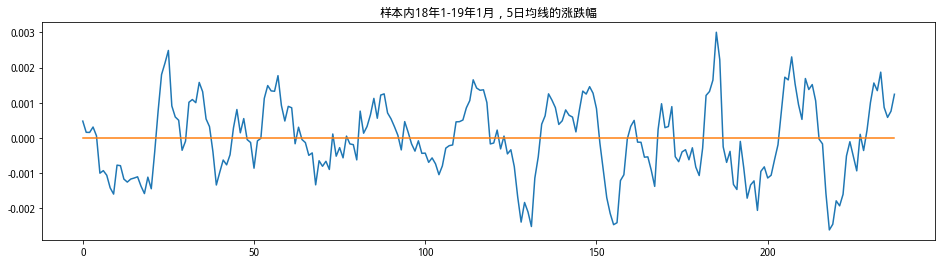

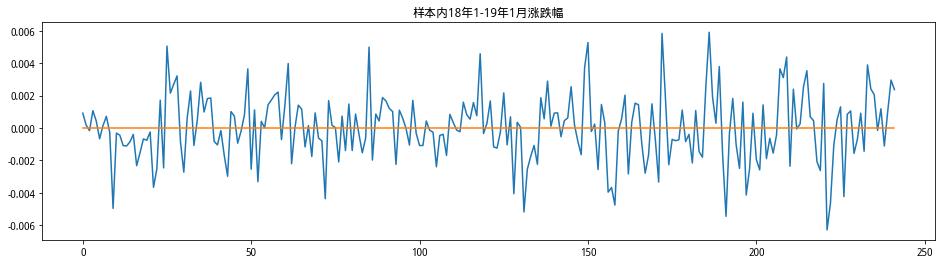

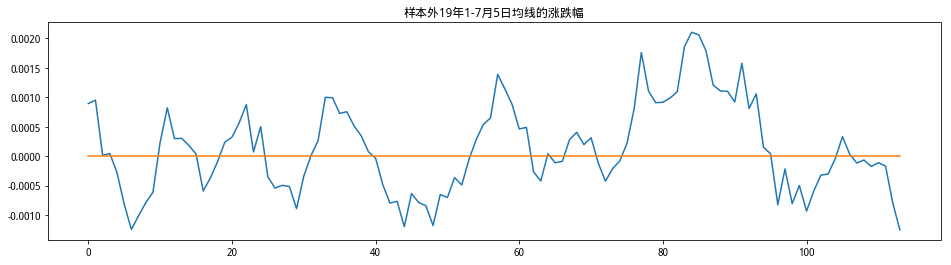

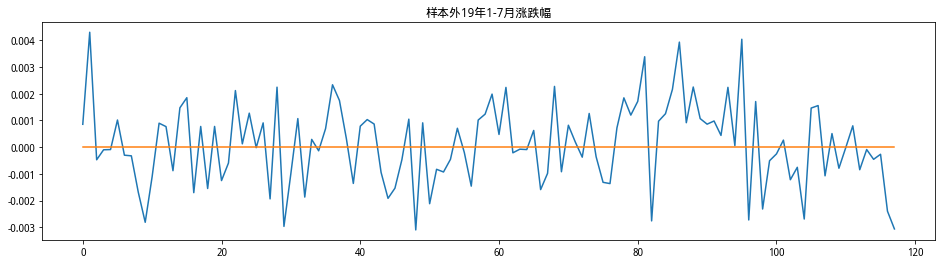

In [13]:
#获取数据
from sklearn.decomposition import PCA
import pandas  as pd 
import seaborn as sns
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus']=False  #图像中负号显示不正常
'''
future_code_list = {'A':'A8888.XDCE', 'AG':'AG8888.XSGE', 'AL':'AL8888.XSGE', 'AU':'AU8888.XSGE',
                        'B':'B8888.XDCE', 'BB':'BB8888.XDCE', 'BU':'BU8888.XSGE', 'C':'C8888.XDCE', 
                        'CF':'CF8888.XZCE', 'CS':'CS8888.XDCE', 'CU':'CU8888.XSGE', 
                        'FB':'FB8888.XDCE', 'FG':'FG8888.XZCE', 'FU':'FU8888.XSGE',  
                        'HC':'HC8888.XSGE', 'I':'I8888.XDCE', 'IC':'IC8888.CCFX', 'IF':'IF8888.CCFX', 
                        'IH':'IH8888.CCFX', 'J':'J8888.XDCE', 'JD':'JD8888.XDCE', 'JM':'JM8888.XDCE', 
                        'JR':'JR8888.XZCE', 'L':'L8888.XDCE', 'LR':'LR8888.XZCE', 'M':'M8888.XDCE', 
                        'MA':'MA8888.XZCE', 'NI':'NI8888.XSGE', 'OI':'OI8888.XZCE', 
                        'P':'P8888.XDCE', 'PB':'PB8888.XSGE', 'PM':'PM8888.XZCE', 'PP':'PP8888.XDCE', 
                        'RB':'RB8888.XSGE', 'RI':'RI8888.XZCE', 'RM':'RM8888.XZCE',  
                        'RS':'RS8888.XZCE', 'RU':'RU8888.XSGE', 'SF':'SF8888.XZCE', 'SM':'SM8888.XZCE', 
                        'SN':'SN8888.XSGE', 'SR':'SR8888.XZCE', 'T':'T8888.CCFX', 'TA':'TA8888.XZCE', 
                        'TC':'TC8888.XZCE', 'TF':'TF8888.CCFX', 'V':'V8888.XDCE', 'WH':'WH8888.XZCE', 
                        'WR':'WR8888.XSGE', 'Y':'Y8888.XDCE', 
                        'ZC':'ZC8888.XZCE', 'ZN':'ZN8888.XSGE'}
'''
future_code_list = {'豆一':'A8888.XDCE', '白银':'AG8888.XSGE', '铝':'AL8888.XSGE', '黄金':'AU8888.XSGE',
                        '豆二':'B8888.XDCE', '胶合板':'BB8888.XDCE', '沥青':'BU8888.XSGE', '玉米':'C8888.XDCE', 
                        '棉花':'CF8888.XZCE', '玉米淀粉':'CS8888.XDCE', '铜':'CU8888.XSGE', 
                        '纤维板':'FB8888.XDCE', '玻璃':'FG8888.XZCE', '燃料油':'FU8888.XSGE',  
                        '热轧卷板':'HC8888.XSGE', '铁矿石':'I8888.XDCE', '中证500':'IC8888.CCFX', '沪深300':'IF8888.CCFX', 
                        '上证50':'IH8888.CCFX', '焦炭':'J8888.XDCE', '鸡蛋':'JD8888.XDCE', '焦煤':'JM8888.XDCE', 
                        '粳稻谷':'JR8888.XZCE', '聚乙烯':'L8888.XDCE', '晚籼稻':'LR8888.XZCE', '豆粕':'M8888.XDCE', 
                        '甲醇':'MA8888.XZCE', '镍':'NI8888.XSGE', '菜籽油':'OI8888.XZCE', 
                        '棕榈油':'P8888.XDCE', '铅':'PB8888.XSGE', '普麦':'PM8888.XZCE', '聚丙烯':'PP8888.XDCE', 
                        '螺纹钢':'RB8888.XSGE', '早籼稻':'RI8888.XZCE', '菜籽粕':'RM8888.XZCE',  
                        '油菜籽':'RS8888.XZCE', '天然橡胶':'RU8888.XSGE', '硅铁':'SF8888.XZCE', '锰硅':'SM8888.XZCE', 
                        '锡':'SN8888.XSGE', '白糖':'SR8888.XZCE', '10年期国债':'T8888.CCFX', 'PTA':'TA8888.XZCE', 
                        '动力煤':'TC8888.XZCE', '5年期国债':'TF8888.CCFX', '聚氯乙烯':'V8888.XDCE', '强麦':'WH8888.XZCE', 
                        '线材':'WR8888.XSGE', '豆油':'Y8888.XDCE', 
                        '动力煤':'ZC8888.XZCE', '锌':'ZN8888.XSGE'}

#获取收盘价序列
df = pd.DataFrame()
for key in future_code_list:
    df_temp =  get_price(future_code_list[key],fields=['close'],start_date = '2018-01-01' ,end_date = '2019-01-01')
    if not df_temp.isnull().values.any():
        df_temp.rename(columns={'close':key},inplace=True)
        df = df.join(df_temp,how='outer')
        
#平滑化处理Ma5
name = df.columns
price = df.values.T
maPrice = []
for i in price:
    temp = []
    for j in range(len(i)-4):
        temp.append(np.mean(i[j:j+5]))
    maPrice.append(temp)
    
#计算对数涨跌幅序列
change = []
for i in maPrice:
    change.append(np.log(np.array(i[1:])/np.array(i[:-1])))

################################################
#此段为调用遗传函数，X为样本集，每一行为一个样本，每一列为一个特征
population=50
generation=200
mutationRate=0.3
paraTop=1
paraBot=-1
X=change
weight,combo=GeneticAlgorithm(population,generation,mutationRate,paraTop,paraBot,X)
################################

fig,ax = plt.subplots(figsize=(16,4))
ax.plot(range(len(combo)),combo)
ax.plot(range(len(combo)),[0]*len(combo))
ax.set_title('样本内18年1-19年1月，5日均线的涨跌幅')
#计算对数涨跌幅序列
gchange = []
for i in price:
    gchange.append(np.log(np.array(i[1:])/np.array(i[:-1])))
    
gcombo=(mat(weight)*mat(gchange)).tolist()[0]
    
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(range(len(gcombo)),gcombo)
ax.plot(range(len(gcombo)),[0]*len(gcombo))
ax.set_title('样本内18年1-19年1月涨跌幅')
#获取收盘价序列
dff = pd.DataFrame()
for key in future_code_list:
    df_temp =  get_price(future_code_list[key],fields=['close'],start_date = '2019-01-01' ,end_date = '2019-07-01')
    if not df_temp.isnull().values.any():
        df_temp.rename(columns={'close':key},inplace=True)
        dff = dff.join(df_temp,how='outer')

namei = dff.columns
pricef = dff.values.T
maPricef = []
for i in pricef:
    temp = []
    for j in range(len(i)-4):
        temp.append(np.mean(i[j:j+5]))
    maPricef.append(temp)
    
#计算对数涨跌幅序列
changef = []
for i in maPricef:
    changef.append(np.log(np.array(i[1:])/np.array(i[:-1])))
magcombof=(mat(weight)*mat(changef)).tolist()[0]
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(range(len(magcombof)),magcombof)
ax.plot(range(len(magcombof)),[0]*len(magcombof))
ax.set_title('样本外19年1-7月5日均线的涨跌幅')
    
#计算对数涨跌幅序列
gchangef = []
for i in pricef:
    gchangef.append(np.log(np.array(i[1:])/np.array(i[:-1])))
    
gcombof=(mat(weight)*mat(gchangef)).tolist()[0]
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(range(len(gcombof)),gcombof)
ax.plot(range(len(gcombof)),[0]*len(gcombof))
ax.set_title('样本外19年1-7月涨跌幅')

显然在样本内我们取得了很好的结果，就连样本外也具有一定的延伸性，所以可以基于此进行策略构建。

In [14]:
weight#本次优化出的一个权重

array([0.021839001897341535, -0.012003776606524094, 0.04056435421434885,
       6.475003773122143e-05, -0.02533531302640748, -0.020811541906573243,
       -0.03869895258194468, -0.030290909339854406,
       -0.0004157277597621093, 0.0038181184636501527, -0.0372676540460781,
       -0.03688809364282229, 0.0059926524751245745, 0.014328338104659319,
       -0.03853209268806596, 0.009997240279082761, 0.02834168743260315,
       -0.01751800199562623, -0.029637654152699477, -0.014837003723812634,
       0.009204554732340272, 0.006843559132908859, 0.0232532783972826,
       -0.00577515367463032, -0.03899654445441577, 0.027991111305576282,
       0.03370666735082715, 0.009353789432680875, 0.003579843597299145,
       0.04182642603324052, 0.0019099034911370782, 0.027105408079657528,
       0.0006152697185047229, 0.02517888995282468, -0.01910965126833008,
       0.02789900531587016, -0.007188364777166501, 0.026546163114038804,
       -0.018303696082446554, 0.0015239137033598825,
       -0.004130